# This data is about Salary data calculated based on Salary and YearsExperience
Y= Salary , X= YearsExperience

## IMPORTING ALL THE LIBRARIES FOR DATA SET

In [1]:
import numpy as np   # Numerical Library # Array
import pandas as pd   # Data Analysys  Tabular Analysys
import matplotlib.pyplot as plt   # Data Visua
import seaborn as sns  # Data Visual

# READ DATA

In [2]:
data = pd.read_csv('/content/Salary_Data.csv')

In [3]:
data.style.background_gradient(cmap='pink_r')

,YearsExperience,Salary
0,1.100000,39343.000000
1,1.300000,46205.000000
2,1.500000,37731.000000
3,2.000000,43525.000000
4,2.200000,39891.000000
5,2.900000,56642.000000
6,3.000000,60150.000000
7,3.200000,54445.000000
8,3.200000,64445.000000
9,3.700000,57189.000000


# EDA - Summary of Data, Data Visualization

#Explore Data in Depth

In [4]:
data.head().style.background_gradient(cmap='pink_r')

,YearsExperience,Salary
0,1.100000,39343.000000
1,1.300000,46205.000000
2,1.500000,37731.000000
3,2.000000,43525.000000
4,2.200000,39891.000000


In [5]:
data.tail().style.background_gradient(cmap='pink_r')

,YearsExperience,Salary
25,9.000000,105582.000000
26,9.500000,116969.000000
27,9.600000,112635.000000
28,10.300000,122391.000000
29,10.500000,121872.000000


In [6]:
data.shape

(30, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
data.describe().style.background_gradient(cmap='pink_r')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
data.describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.000000,5.313333,2.837888,1.100000,3.200000,4.700000,7.700000,10.500000
Salary,30.000000,76003.000000,27414.429785,37731.000000,56720.750000,65237.000000,100544.750000,122391.000000


In [11]:
data.count()

YearsExperience    30
Salary             30
dtype: int64

In [12]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [14]:
data.sample().style.background_gradient(cmap='pink_r')

,YearsExperience,Salary
19,6.000000,93940.000000


In [15]:
data.sample(5).style.background_gradient(cmap='pink_r')

,YearsExperience,Salary
15,4.900000,67938.000000
24,8.700000,109431.000000
2,1.500000,37731.000000
7,3.200000,54445.000000
5,2.900000,56642.000000


# Visualization of Data

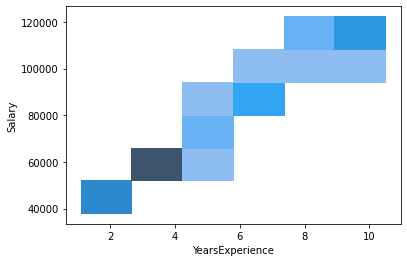

In [16]:
sns.histplot(x='YearsExperience',y='Salary',data=data)

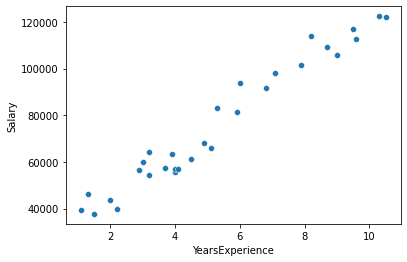

In [17]:
sns.scatterplot(x='YearsExperience',y='Salary',data=data)
plt.show()

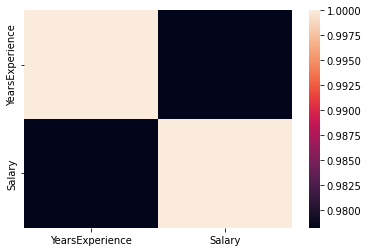

In [18]:
sns.heatmap(data.corr())

<function matplotlib.pyplot.show(*args, **kw)>

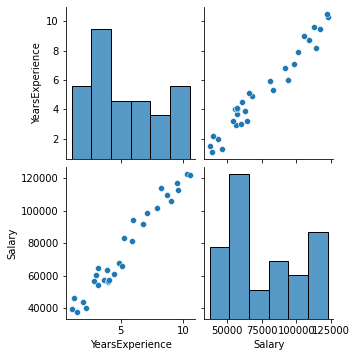

In [19]:
sns.pairplot(data)
plt.show

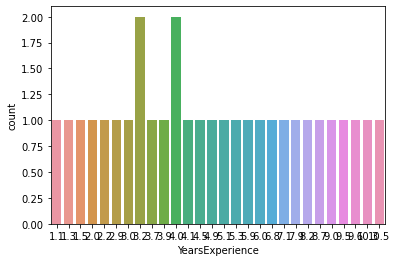

In [20]:
sns.countplot(x='YearsExperience',data=data)
plt.show()

# Dependent and independent Variable

In [21]:
y = data['Salary']
x = data.drop(['Salary'], axis=1)

In [22]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


# Spliting the Data into Training data and Testing data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [25]:
print(x_test)

    YearsExperience
27              9.6
15              4.9
23              8.2
17              5.3
8               3.2
9               3.7
28             10.3
24              8.7
12              4.0


In [26]:
print(x_train)

    YearsExperience
0               1.1
4               2.2
16              5.1
5               2.9
13              4.1
11              4.0
22              7.9
1               1.3
2               1.5
25              9.0
3               2.0
21              7.1
26              9.5
18              5.9
29             10.5
20              6.8
7               3.2
10              3.9
14              4.5
19              6.0
6               3.0


In [27]:
print(y_train)

0      39343.0
4      39891.0
16     66029.0
5      56642.0
13     57081.0
11     55794.0
22    101302.0
1      46205.0
2      37731.0
25    105582.0
3      43525.0
21     98273.0
26    116969.0
18     81363.0
29    121872.0
20     91738.0
7      54445.0
10     63218.0
14     61111.0
19     93940.0
6      60150.0
Name: Salary, dtype: float64


In [28]:
print(y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64


# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Prediction With Test Data

In [31]:
y_pred = lr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


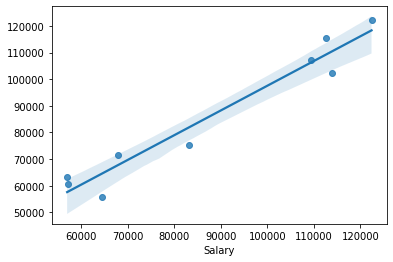

In [32]:
sns.regplot(y_test,y_pred,fit_reg=True)

# Coefficient and Intercept

In [33]:
b = lr.coef_

In [34]:
print("Coefficient  :" , b)

Coefficient  : [9339.08172382]


In [35]:
a = lr.intercept_

In [36]:
print("Intercept : ", a)

Intercept :  25918.438334893202


# Predicting Unknown Values

In [37]:
# y_pred=9339.08172382×(years of experience)+25918.438334893202
#y_predict(9)
print(lr.predict([[9]]))

[109970.17384923]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Evaluation

In [38]:
from sklearn import metrics

In [39]:
#Mean Squared Error (MSE)

In [40]:
print('Mean Squared Error (MSE)  : ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE)  :  37784662.46621314


In [41]:
import statsmodels.api as sm

Ordinary Least-Squares (OLS) estimator module can be called from statsmodels.api to get regression summary.

# Ordinary Least-Squares (OLS) 

In [42]:
x_stat = sm.add_constant(x_train)
regsummary = sm.OLS(y_train, x_stat).fit()
regsummary.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     427.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.74e-14
Time:                        07:23:14   Log-Likelihood:                -210.19
No. Observations:                  21   AIC:                             424.4
Df Residuals:                      19   BIC:                             426.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.592e+04   2507.522     10.336      0.000    2.07e+04    3.12e+04
YearsExperience  9339.0817    451.653     20.678      0.000    8393.761    1.03e+04
==============================================================================
Omnibus:                        0.532   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.625
Skew:                           0.281   Prob(JB):                        0.732
Kurtosis:                       2.368   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""